<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사하강법 (Stochastic Gradient Descent)

훈련세트 데이터가 계속해서 들어오는 상황이라고 생각해보자.

훈련 데이터가 점차 늘어남에따라 아래 방법으로 학습하는 것을 생각해볼 수 있다.

1) 매일 새로 들어오는 훈련 데이터를 포함해서 모델을 새로 학습한다.
-> 이 방법은 시간이 지날수록 훈련에 필요한 컴퓨팅 파워가 지속적으로 증가하여 좋지 않은 방법이다. 학습한 모델을 버리고 매일 더욱 증가하는 훈련 데이터로 학습을 해야한다.

2) 훈련데이터가 새로 들어온 만큼 앞서 수집한 훈련 데이터를 제거하고 매일 새로운 모델을 일정량의 훈련 데이터를 이용해 학습한다.
-> 이 방법은 앞서 중요한 훈련 데이터가 섞여있을 때 버려진다면 모델의 성능이 저하되는 문제가 있다.

이를 종합해보면, 훈련 데이터가 지속적으로 들어올 때 이전 모델을 버리지 않고 계속 들어오는 훈련세트를 훈련에 활용하는 방안이 필요하다.

이 것이 바로 ```Stochastic Gradient Descent (확률적 경사하강법)``` 이다.

```Stochastic``` 은 확률적 이라는 의미가 있다. 즉, 랜덤하게 라는 의미다.

```Gradient```은 기울기(경사)를 말한다.

```Descent```은 하강을 말한다.

즉 종합하면, 랜덤하게 경사를 내려오면서 최적의 대상을 찾는 과정(=학습)을 하는 것이 이 확률적경사하강법 이다.

이 때, 경사하강은 훈련세트에서 랜덤하게 하나의 샘플을 활용하여 경사를 조금씩 내려가며, 이 과정을 전체 훈련세트의 모든 샘플들에 대해 수행한다.

전체 훈련세트에 대해 이 과정을 완료하였음에도 불구하고, 경사를 다 내려오지 못했다면, 훈련세트에 모든 샘플들을 다시 채워 넣는다. 이렇게 전체 샘플에 대해 한번씩 경사를 내려오는 학습의 단위를 ```에포크(epoch)```라고 한다.

실제로는 한 번에 하나의 샘플이 아닌, 무작위의 몇 개의 샘플을 꺼내 경사를 내려오는데, 이 방식을 ```미니배치 경사 하강법(minibatch gradient descent)``` 라고 한다.

# 손실 함수 (loss function)

손실 함수는 머신러닝 알고리즘의 성능을 평가하는 척도로, 손실값이 낮을 수록 더욱 뛰어난 성능이라고 할 수 있다. 즉 이 손실함수의 값을 최소화 하는 것이 훈련의 과정이다.

분류에서 '손실'은 아주 확실하다. 정답을 못 맞히는 것
4개 샘플 중 2개를 맞힌다면 정확도는 0.5이다.
그러나 이 정확도가 손실함수로 적절할까?

경사하강법은 말 그대로 '연속'된 '경사'를 내려가면서 최적의 계수를 찾는 학습방법이다. 즉 어느 지점에 대해 미분 가능한 연속적인 손실함수를 사용해야 그 지점에 대한 기울기를 계산할 수 있고, 이를 바탕으로 경사를따라 내려갈 수 있기 때문에 손실함수로는 연속 함수를 사용해야 한다.

[참고링크](https://heung-bae-lee.github.io/2019/12/08/deep_learning_02/)

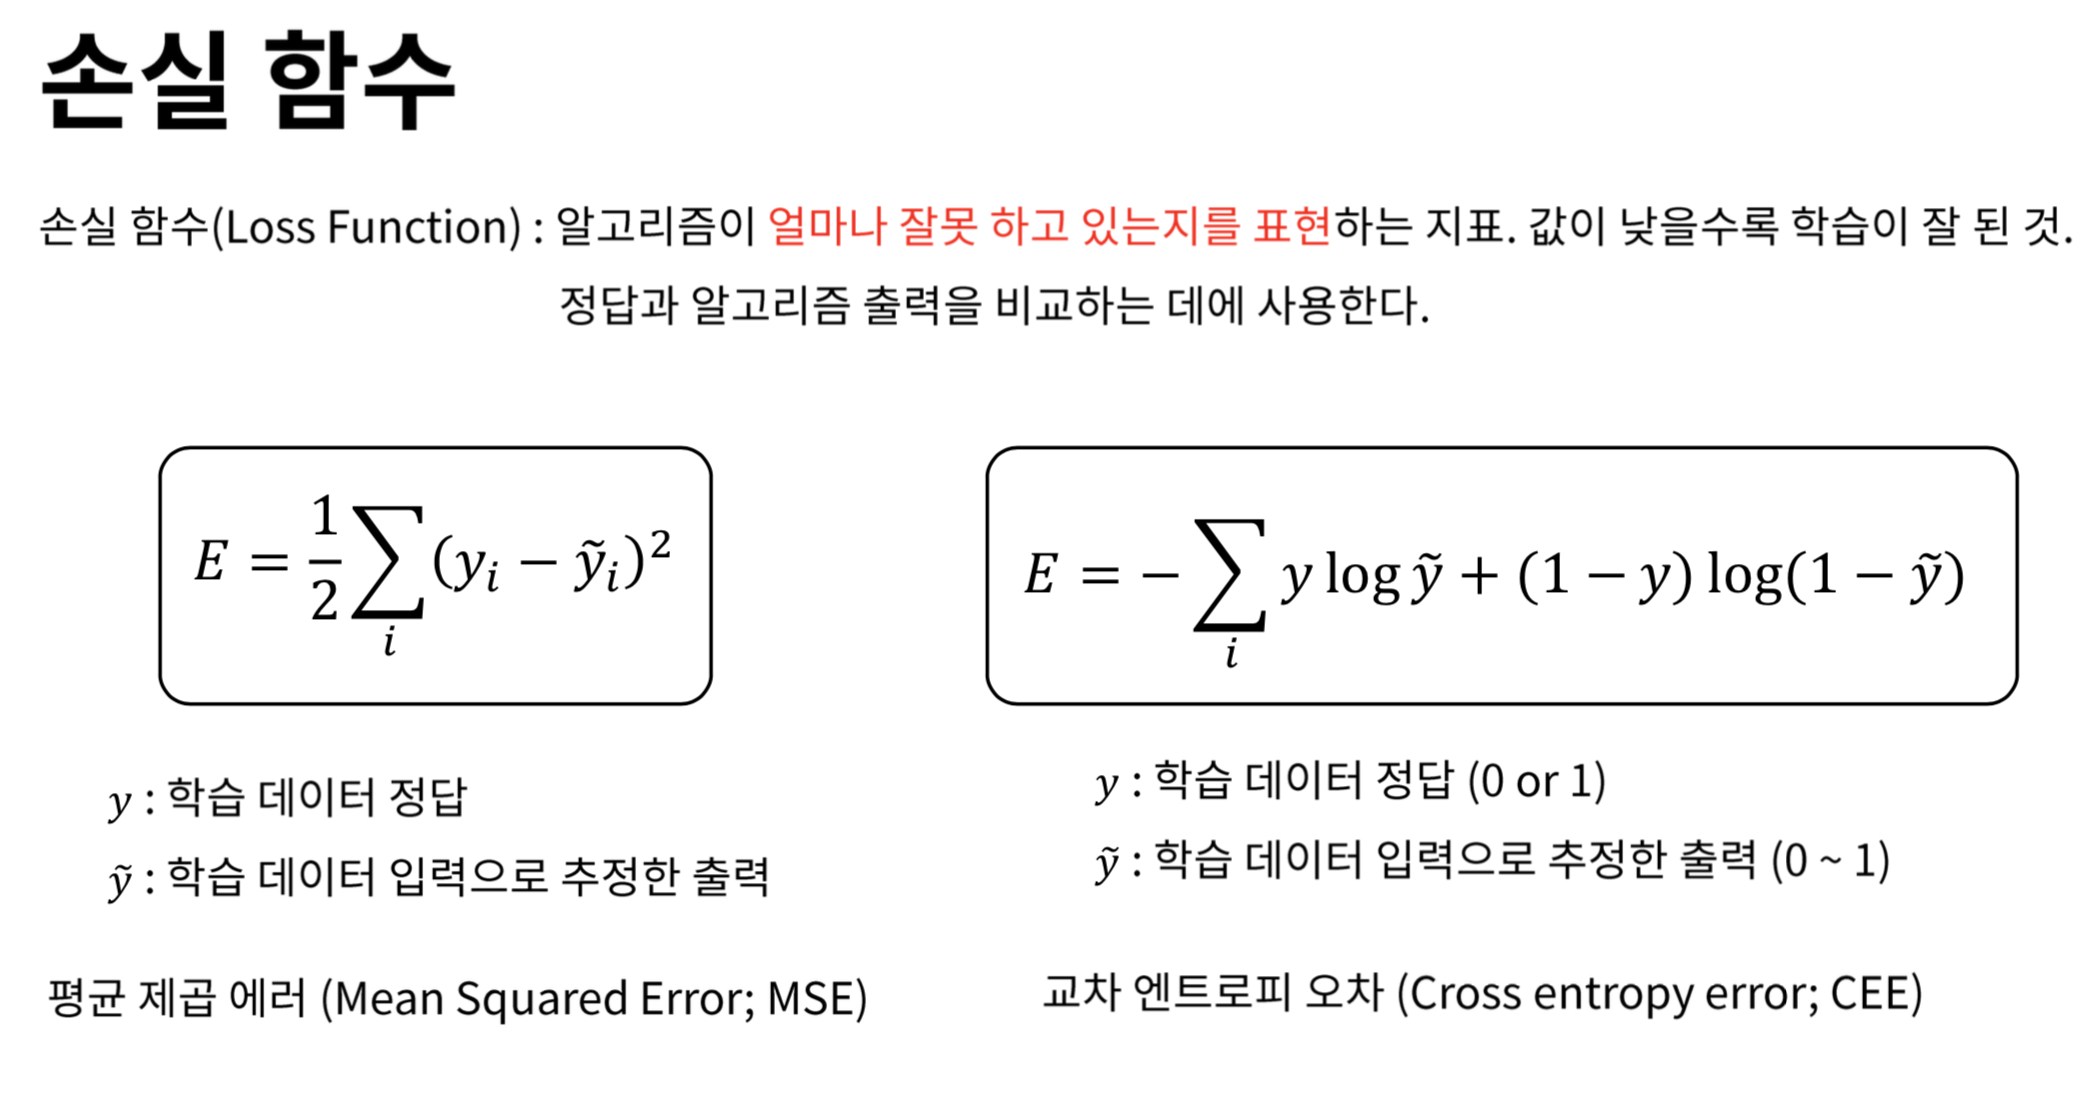

In [3]:
# 로지스틱 손실함수 / 이진 크로스엔트로피 손실함수 -> 이진 분류의 손실함수.
# 크로스엔트로피 손실함수 -> 다중 분류의 손실함수.

# 양의 타겟을 1, 음의 타겟을 0이라 할 때, 0.8로 양의 타겟을 예측한 것은 80%의 확률로 타겟이 1인 대상에 대해 샘플이 1이라고 예측한 것이다.
# 즉 0~1의 확률에서 타겟이 1인 샘플을 0.8의 확률로 1이라고 한 셈이다.
# 확률을 p라고 할 때, 이 갚이 높아질 수록 성능이 좋은 것.
# 반대로 손실함수를 최소화 하여 최적화 한다는 개념으로 접근하면, -p 가 최소화 되는 것이라 할 수 있다.

# 이를 어느지점에서도 미분 가능한 연속된 손실함수로 만들기 위해서 -log(p) 로 손실함수를 만들 수 있다.
# 반대로 음의 타겟에 대해서는 1-음의타겟 을 최소화 시키는 손실함수라고 생각할 수 있으므로 -log(1-p) 로 손실함수를 만들 수 있다.
# 따라서 이진 크로스엔트로피 손실함수, 즉 로지스틱 손실함수는 이렇게 정의할 수 있다.

# loss function = 
# -log(p) : 양의 타겟
# -log(1-p) : 음의 타겟

# SGDClassifier 로 손실함수를 곁들인 경사하강법을 사용해서 모델을 만들어보자!

import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 훈련셋 기준으로 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 사이킷런의 대표적인 분류용 확률경사하강법 클래스인 SGDClassifier 사용해보자
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print("train Score: ", sc.score(train_scaled, train_target))
print("test Score: ", sc.score(test_scaled, test_target))

train Score:  0.773109243697479
test Score:  0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [4]:
# 참고로 위 ConvergenceWarning 은 모델이 충분히 학습하지 않아 수렴이 덜 되었다는 '경고' 메시지이다.
# max_iter 를 더욱 늘려 학습해보자.

# partial_fit() 은 모델을 이어서 훈련시킬 때 사용한다.
sc.partial_fit(train_scaled, train_target)
print("train Score: ", sc.score(train_scaled, train_target))
print("test Score: ", sc.score(test_scaled, test_target))
              
# 훈련 세트를 모두 한번에 사용했으니 이건 배치 경사 하강법이 아닌가 하는 생각이 들 수 있지만,
# SGDClassifier 클래스는 샘플을 하나씩 꺼내서 경사 하강법을 수행하므로 확률적 경사 하강법이다.

train Score:  0.8151260504201681
test Score:  0.85


# 과소적합과 과대적합

훈련세트와 테스트세트의 성능을 y축으로, 에포크를 x축으로 잡았을 때, 테스트세트의 성능이 떨어지기 시작하는 시점이 바로 '모델이 과대적합되기 시작하는 시점'이다.

과대적합은 이러한 시점 전에 훈련을 멈추는 것을 '조기종료(early stopping)'이다.

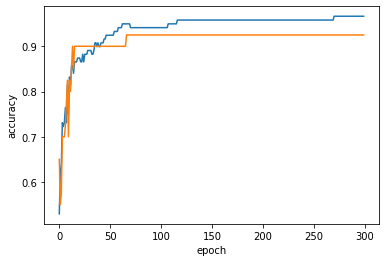

In [5]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

# epoch 마다 train, test 샘플에 대한 성능을 기록해나가며 시각화 해보자.
# epoch 마다 학습된 것을 확인하므로 partial_fit()을 사용한다.

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

partial_fit을 사용해서 300회의 에포크동안 학습한 결과, 100 에포크 전으로는 훈련, 테스트세트의 성능이 저조한 것으로 보아 과소적합 된 것을 알 수 있다.

또한 100 에포크 이후 시점으로 점점 훈련세트의 성능과 테스트세트의 성능이 벌어지고 있다.

이 모델의 경우 100 에포크가 적절한 학습 에포크 수로 볼 수 있다.

In [6]:
# epoch 100 동안 학습하도록 바꿔보자.
sc = SGDClassifier(loss='log', random_state=42, max_iter=100, tol=None)
sc.fit(train_scaled, train_target)
print("train_score: ", sc.score(train_scaled, train_target))
print("test_score: ", sc.score(test_scaled, test_target))

# tol 을 설정하면 에포크를 반복하면서 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 지정한 max_iter까지 반복하지 않고 멈춘다.
# 여기서는 tol=None 으로 설정했기 때문에 멈추지 않고 학습한다.

# 추가로 아래 2 개 기억하자.
# 1) 서포트벡터머신(SVM) 이라는 유명한 머신러닝 알고리즘이 있다.
# 2) SGDClassifier 의 기본 손실함수는 'hinge'라는 '힌지손실'함수다.

train_score:  0.957983193277311
test_score:  0.925
